In [39]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout
import matplotlib.pyplot as plt

In [40]:
# Generate training data
np.random.seed(1)
X = np.random.uniform(-2*np.pi, 2*np.pi, 1000)  # Input features with 1000 samples
y = np.sin(X)  # Target variable is the sine of X

In [41]:
# Add Gaussian noise to the training data
noise_level = 0.1  # Adjust the noise level as desired
X_noisy = X + np.random.normal(0, noise_level, size=X.shape)
y_noisy = y + np.random.normal(0, noise_level, size=y.shape)

In [42]:
# # Define the MLP model
# model = Sequential()
# model.add(Dense(8, input_dim=1, activation='relu'))  # Hidden layer with 8 neurons
# model.add(Dense(1))  # Output layer
# Define the MLP model
model = Sequential()
model.add(Dense(16, input_dim=1, activation='relu'))  # Hidden layer with 16 neurons
model.add(Dropout(0.2))  # Dropout layer for regularization
model.add(Dense(8, activation='relu'))  # Additional hidden layer
model.add(Dense(1))  # Output layer

In [43]:
# Compile the model
model.compile(loss='mean_squared_error', optimizer='adam')

In [44]:
# Train the model
history = model.fit(X, y, epochs=200, batch_size=32, verbose=0) # epochs=100

In [45]:
# Generate test data
X_test = np.linspace(-2*np.pi, 2*np.pi, 100)
y_test = np.sin(X_test)

In [46]:
# Make predictions
predictions = model.predict(X_test)

4/4 [==============================] - 0s 5ms/step


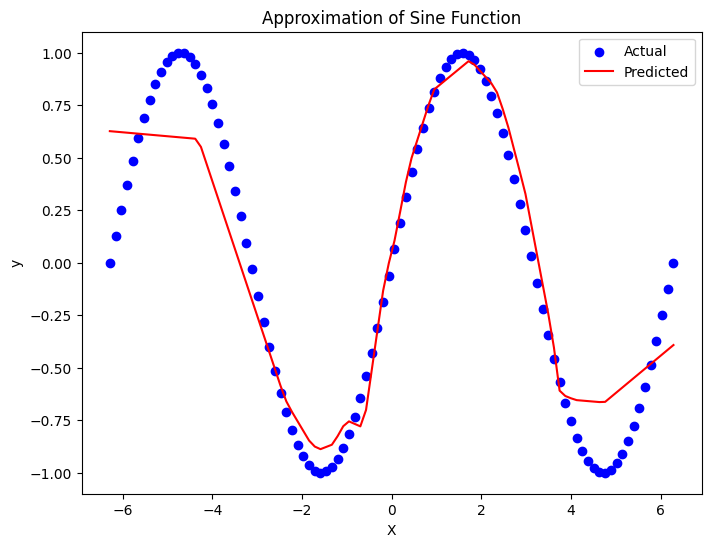

In [47]:
# Plot the results
plt.figure(figsize=(8, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, predictions, color='red', label='Predicted')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Approximation of Sine Function')
plt.legend()
plt.show()